# <center> **Insights from the AWS SaaS Sales Dataset: Underlying Problems and How to Solve Them**</center>

This notebook was created to meet the requirements of Purwadhika's DTI Data Science program for Capstone Project 2. Using the AWS SaaS Sales Dataset, I formulated a series of problems based on the business needs and challenges faced by the company. As this project emphasizes data analysis, I assumed the role of a data analyst within the company.
<div style="text-align: right;">
    Created by: S. Fabilia (2024)
</div>

***

**What are the contents of this notebook?**
<br>
1. Background
2. Problem Statement
3. Data
<br>
3.1. Setup Data
<br>
3.2. Data Exploration
<br>
3.3. Data Cleaning
<br>
3.4. Data Review
4. Data Analysis
<br>
4.1. Sales, Quantity, and Profitability Overview
<br>
4.2. Geographical Performance Analysis
<br>
4.3. Customer Segmentation Analysis
<br>
4.4. Recency, Frequency, and Monetary (RFM) Analysis
5. Final Thoughts
<br>
5.1. Conclusion
<br>
5.2. Recommendation

***
## **1. Background**



Amazon Web Services (AWS) is the world's most comprehensive and broadly adopted cloud, offering over 200 fully featured services from data centers globally [(Amazon, 2024)](https://aws.amazon.com/what-is-aws/).
 As cloud computing has evolved, AWS has emerged as a top choice, providing a diverse mix of Infrastructure-as-a-Service (IaaS), Platform-as-a-Service (PaaS), and Software-as-a-Service (SaaS) solutions.

SaaS, or Software-as-a-Service, is a method of delivering applications over the Internet as a service [(Salesforce, 2024)](https://www.salesforce.com/ap/saas/). Instead of installing and maintaining software, users access it via the Internet, eliminating the complexities of software and hardware management. According to a [Canalys study](https://www.canalys.com/insights/hyperscale-cloud-marketplaces-saas-channels), cloud marketplaces are emerging as the fastest-growing route to market for SaaS software, projected to reach $45 billion by 2025, with an 84% compound annual growth rate (CAGR) over five years.

In Q1 2024, major cloud providers AWS, Google, Alibaba, Salesforce, Microsoft, and others competed in a $76 billion market [(Haranas, 2024)](https://www.crn.com/news/cloud/2024/aws-google-microsoft-battle-over-76b-q1-cloud-market-share?page=6). Amazon maintains a strong lead, holding a 31% market share, though Microsoft and Google showed stronger year-on-year growth at 25% and 11% respectively [(Synergy Research Group, 2024)](https://www.srgresearch.com/articles/huge-cloud-market-sees-a-strong-bounce-in-growth-rate-for-the-second-consecutive-quarter).

***
## **2. Problem Statement**

Despite AWS's leading position, its market share decreased from 33% in 2022 [(Synergy Research Group, 2022)](https://www.theregister.com/2022/05/02/cloud_market_share_q1_2022/) to 31% in 2024 [(Synergy Research Group, 2024)](https://www.srgresearch.com/articles/huge-cloud-market-sees-a-strong-bounce-in-growth-rate-for-the-second-consecutive-quarter). While this decline might seem minor, it is concerning given the competitive landscape. If AWS is inattentive to what is currently happening, other companies can take their throne. To address this, AWS must detect underlying problems and implement effective strategies to maintain and potentially increase its market share.

**The analysis of the AWS SaaS Sales Dataset aims to address the problems through these following questions:**
<br>
1. How do sales, profit, and quantity sold vary by country, city, and region, and what are the possible reasons for these variations?

2. Are there specific regions or subregions where sales performance is consistently below average, and what factors might be contributing to this?

3. How does AWS customer segmentation look like according to the dataset? Are there any other suggestions than what was written in the dataset? And what should we do with it?

**From the questions stated above, this report has 2 key arguments, which are:**
<br>
1. Understanding variations in sales and profitability by country, city, and region will uncover untapped opportunities and areas for improvement within different geographical areas.

2. Customer segmentation and RFM analysis will provide insights into enhancing customer retention, thereby addressing potential gaps and opportunities identified in the analysis.

***
## **3. Data**

The AWS SaaS Sales Dataset comprises transactional information from an imaginary SaaS (Software as a Service) firm specializing in sales and marketing software for business-to-business (B2B) interactions. Each row in the dataset represents a product within a transaction, providing insights into the purchasing behavior of customers within the AWS ecosystem. The dataset descriptions are as follow:



| No.  | Field Name      | Description                                      |
|------|-----------------|--------------------------------------------------|
| 1    | Row ID          | A unique identifier for each transaction.        |
| 2    | Order ID        | A unique identifier for each order.              |
| 3    | Order Date      | The date when the order was placed.              |
| 4    | Date Key        | A numerical representation of the order date (MMDDYYYY).|
| 5    | Contact Name    | The name of the person who placed the order.     |
| 6    | Country         | The country where the order was placed.          |
| 7    | City            | The city where the order was placed.             |
| 8    | Region          | The region where the order was placed.           |
| 9    | Subregion       | The subregion where the order was placed.        |
| 10   | Customer        | The name of the company that placed the order.   |
| 11   | Customer ID     | A unique identifier for each customer.           |
| 12   | Industry        | The industry the customer belongs to.            |
| 13   | Segment         | The customer segment (SMB, Strategic, Enterprise, etc.).|
| 14   | Product         | The product that was ordered.                    |
| 15   | License         | The license key for the product.                 |
| 16   | Sales           | The total sales amount for the transaction.      |
| 17   | Quantity        | The total number of items in the transaction.    |
| 18   | Discount        | The discount applied to the transaction.         |
| 19   | Profit          | The profit from the transaction.                 |

### **3.1. Setup Data**

Before performing any operations on the data, it is essential to first import the necessary libraries and load the dataset.

#### **Importing Libraries**

In [199]:
import missingno
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importing Dataset**

In [200]:
df = pd.read_csv('SaaS-Sales.csv')
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **3.2. Data Exploration**

After loading the necessary libraries and dataset, the next step is to explore and understand the dataset's contents.

#### **Dataset Check**

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The **datatype** of the columns are: integer, object, and float.





From df.info, we can conclude that the initial database have **9994 rows and 19 columns**.

This can be validated by checking the shape of the dataset.

In [202]:
print('Amount of Rows and Column:',df.shape)

Amount of Rows and Column: (9994, 19)


We can also examine the date range within the dataset to understand the time period it covers.

In [203]:
datasetDate = df.sort_values(by='Order Date')
display(datasetDate[['Order Date']].head(1))
display(datasetDate[['Order Date']].tail(1))

,Order Date
1152,1/1/2023


,Order Date
6648,9/9/2023


This means that the dataset contains dates ranging from **January 4, 2020, to December 31, 2023**.

#### **Unique Value**

After gaining an understanding of the dataset's contents, the next step is to identify and analyze the unique values within it.

In [204]:
pd.set_option('display.max_colwidth',1000)
listItem = []

for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Sample of Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique Values,Sample of Unique Values
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, A..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 20201226, 20200920, 20231106, 20221107, 20230203, 20221014, 20220906, 20230919, 20231223, 20210907, 20201022, 20220314, 20210531, 20210528, 20200301, 20221121, 20220512, 20211228, 20221117, 20221108, 20200908, 20200805, 20200914, 20230422, 20211121, 20211215, 20201119, 20221129, 20200826, 20220717, 20211012, 20211031, 20200321, 20230707, 20230625, 20200803, 20231218, 20230604, 20231202, 20210209, 20210102, 20221..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison

#### **Data Description**

After understanding the contents of the dataset, the next step is to examine its descriptive statistics.

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4.997500e+03,2885.163629,1.000000e+00,2.499250e+03,4.997500e+03,7.495750e+03,9.994000e+03
Date Key,9994.0,2.021803e+07,11238.975964,2.020010e+07,2.021052e+07,2.022063e+07,2.023052e+07,2.023123e+07
Customer ID,9994.0,1.049772e+03,29.719388,1.001000e+03,1.024000e+03,1.049000e+03,1.076000e+03,1.101000e+03
Sales,9994.0,2.298580e+02,623.245101,4.440000e-01,1.728000e+01,5.449000e+01,2.099400e+02,2.263848e+04
Quantity,9994.0,3.789574e+00,2.225110,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.400000e+01
Discount,9994.0,1.562027e-01,0.206452,0.000000e+00,0.000000e+00,2.000000e-01,2.000000e-01,8.000000e-01
Profit,9994.0,2.865690e+01,234.260108,-6.599978e+03,1.728750e+00,8.666500e+00,2.936400e+01,8.399976e+03


As shown, the transposed data makes it easier to view the numerical columns.

Below, you can find further information about the non-numerical columns.

In [206]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,EMEA-2023-100111,14
Order Date,9994,1237,9/6/2022,38
Contact Name,9994,793,Leonard Kelly,37
Country,9994,48,United States,2001
City,9994,262,London,922
Region,9994,3,EMEA,4219
Subregion,9994,12,NAMER,2507
Customer,9994,99,Allianz,192
Industry,9994,10,Finance,2127
Segment,9994,3,SMB,5191


### **3.3. Data Cleaning**

#### **Handling Missing Values**

Each column **doesn't have any null values**, as indicated by the non-null count matching the number of rows (as shown by df.info()). This means there is no need to fill in any missing values.

This can be further confirmed by using the *isnull* method and the *missingno* library.

In [207]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [208]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: >

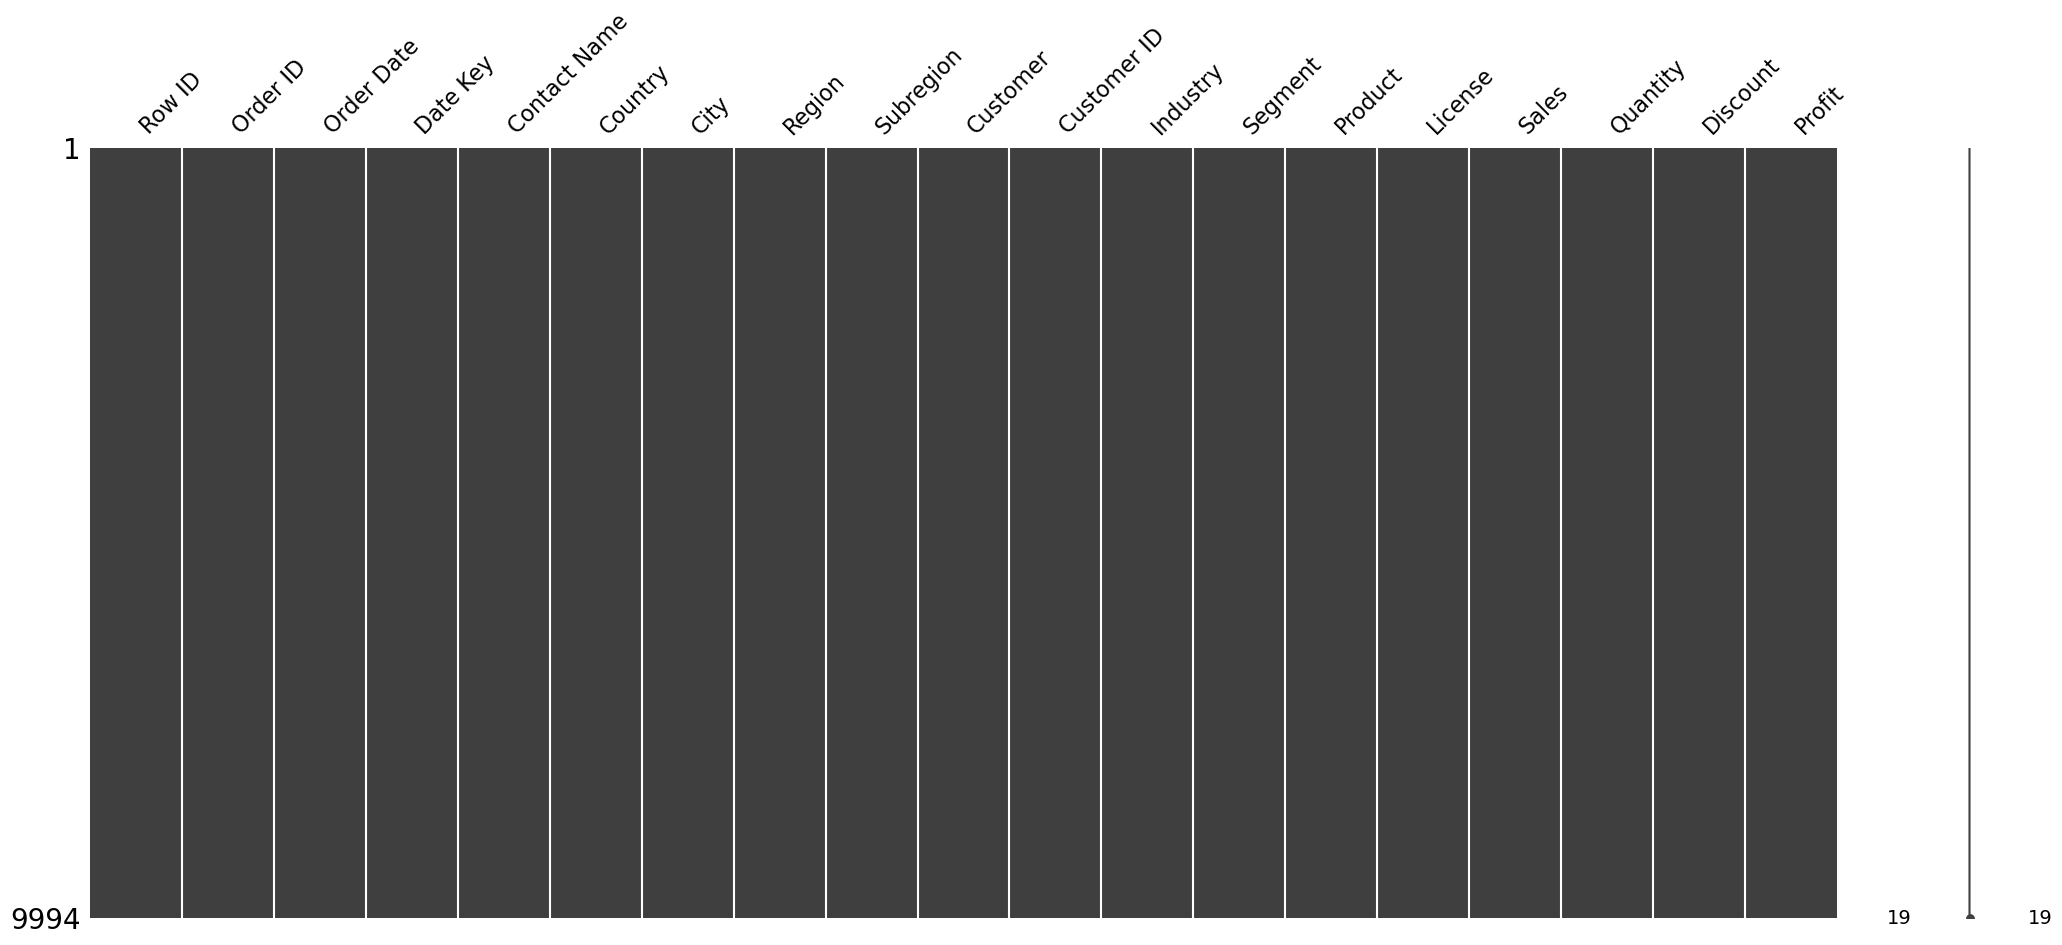

In [209]:
missingno.matrix(df)

#### **Duplicates**

It's crucial to check for duplicates as they can significantly impact the outcome of the analysis.

In [210]:
df.duplicated().sum()

0

In [211]:
df.duplicated().any()

False

As seen from the results, there are **no duplicates**. Thus, there are no records that needs to be dropped.

#### **Standardizing Data Format**

As stated above, even though there is an order date column, the data type is object. To ease the analysis, we need to change it to datetime.

In [212]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtype)

datetime64[ns]


#### **Redundant Columns**

We should drop redundant columns because they do not provide additional meaningful information for analysis and can unnecessarily increase complexity. The columns we're going to drop are:
<br>
1. **Row ID**: Only useful for internal data management and doesn't provide any analytical value.

2. **Date Key**: Because we already have the Order Date column in a usable format, the Date Key column is redundant.

3. **Contact Name**: Personal info is not necessary as we will not analyze it by individual contacts (AWS SaaS is a B2B business).

4. **Customer ID**: Because we already have the Customer column in a usable format, the Customer ID column is redundant.

4. **License**: As the license key is unique for each transaction, it does not provide analytical value.

In [213]:
df = df.drop(columns=['Row ID'])

In [214]:
df = df.drop(columns=['Date Key'])

In [215]:
df = df.drop(columns=['Contact Name'])

In [216]:
df = df.drop(columns=['Customer ID'])

In [217]:
df = df.drop(columns=['License'])

#### **Outlier Checking**

Outliers needs to be checked because they are extreme values in a dataset that can significantly impact statistical analyses, hypothesis tests, and regression models.

We begin by identifying and categorizing outliers in 'Profit','Quantity','Sales', and 'Discount' with 'Product' for grouping.

In [218]:
num_cols = ['Sales','Quantity','Discount','Profit']

In [219]:
num_data = df[num_cols]
num_data

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


For an easier overview, I turned the data into **histogram** and **boxplot**.

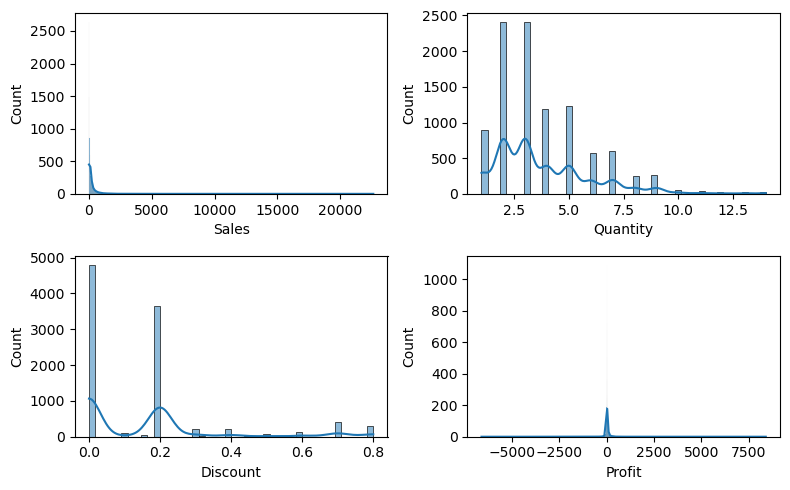

In [220]:
fig = plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.histplot(df['Sales'], kde = True)
fig.tight_layout()

plt.subplot(2,2,2)
sns.histplot(df['Quantity'], kde = True)
fig.tight_layout()

plt.subplot(2,2,3)
sns.histplot(df['Discount'], kde = True)
fig.tight_layout()

plt.subplot(2,2,4)
sns.histplot(df['Profit'], kde = True)
fig.tight_layout()

Observing the histogram, we note the following:
<br>
- Sales displays a right skew, indicating a non-normal distribution.
- Quantity also exhibits a right skew, suggesting a non-normal distribution.
- Similarly, Discount shows a right skew, indicating departure from normality.
- On the other hand, Profit appears to follow a relatively normal distribution upon initial examination.

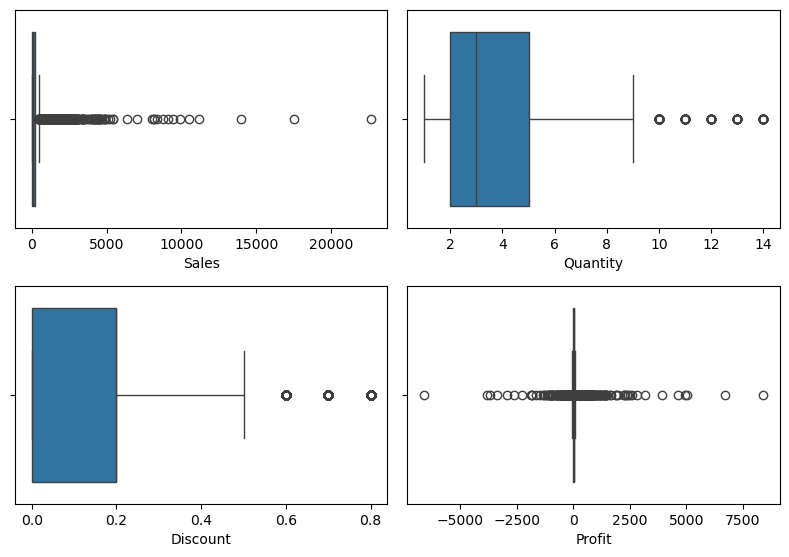

In [221]:
fig = plt.figure(figsize=(8,8))
position = 1

for columns in num_data.columns:
  plt.subplot(3,2,position)
  sns.boxplot(x = num_data[columns])
  fig.tight_layout()

  position += 1

plt.show()

Upon inspection, it's evident that numerous outliers are present, particularly noticeable in the Sales and Profit columns.
<br>
- Sales: Transactions span a wide range, with a majority falling into smaller value categories, yet a considerable number feature significantly larger values, leading to a right-skewed distribution.

- Quantity: While most transactions involve modest quantities (typically 2-5 units per purchase), a subset exhibits higher quantities exceeding 10 units, resulting in a right-skewed distribution.

- Discount: Discounts primarily cluster within the range of 0.0 to 0.2; however, outliers are evident at values exceeding 0.6, contributing to a right-skewed distribution.

- Profit: While the overall distribution of profits appears symmetrical, the presence of numerous extreme values, both negative and positive, indicates non-normality, rendering the data distribution non-normal.

Now, we begin identifying the outlier by calculating the Q1, Q3, IQR, lower and upper bound to get the number of outliers

In [222]:
Q1 = num_data[['Sales','Quantity','Discount','Profit']].quantile(0.25)
print('Q1 are:')
print(Q1)

Q1 are:
Sales       17.28000
Quantity     2.00000
Discount     0.00000
Profit       1.72875
Name: 0.25, dtype: float64


In [223]:
Q3 = num_data[['Sales','Quantity','Discount','Profit']].quantile(0.75)
print('Q3 are:')
print(Q3)

Q3 are:
Sales       209.940
Quantity      5.000
Discount      0.200
Profit       29.364
Name: 0.75, dtype: float64


In [224]:
IQR = Q3 - Q1
print('The IQR are:')
print(IQR)

The IQR are:
Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


In [225]:
lower_bound = Q1 - 1.5 * IQR
print('The lower bound are:')
print(lower_bound)

The lower bound are:
Sales      -271.710000
Quantity     -2.500000
Discount     -0.300000
Profit      -39.724125
dtype: float64


In [226]:
upper_bound = Q3 + 1.5 * IQR
print('The upper bound are:')
print(upper_bound)

The upper bound are:
Sales       498.930000
Quantity      9.500000
Discount      0.500000
Profit       70.816875
dtype: float64


Thus, we will get this as a result:

In [227]:
for columns in num_data.columns:
  q1 = num_data[[columns]].describe().loc['25%']
  q3 = num_data[[columns]].describe().loc['75%']
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  total_outliers = len(df[(num_data[columns] < lower_bound) | (num_data[columns] > upper_bound)])
  print(f'{columns} have {total_outliers} outliers.')

Sales have 1167 outliers.
Quantity have 170 outliers.
Discount have 856 outliers.
Profit have 1881 outliers.


C:\Users\asus\AppData\Local\Temp\ipykernel_29620\939764826.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  upper_bound = float(q3 + whis)
C:\Users\asus\AppData\Local\Temp\ipykernel_29620\939764826.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lower_bound = float(q1 - whis)
C:\Users\asus\AppData\Local\Temp\ipykernel_29620\939764826.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  upper_bound = float(q3 + whis)
C:\Users\asus\AppData\Local\Temp\ipykernel_29620\939764826.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lower_bound = float(q1 - whis)
C:\Users\asus\AppData\Local\Temp\ipy

Having identified the abundance of outliers, it's best to scrutinize their relevance before deciding if the outliers needs to be dropped or not. This assessment will involve examining the mean values and comparing them with the data distributions observed in the discount and quantity columns, as inferred from the boxplot

In [228]:
num_data[['Sales','Quantity','Discount','Profit']].mean()

Sales       229.858001
Quantity      3.789574
Discount      0.156203
Profit       28.656896
dtype: float64

In [229]:
df[df['Quantity'] > 9][['Sales','Quantity','Discount','Profit']].sort_values(by=['Quantity', 'Profit'], ascending=False).head(5)

,Sales,Quantity,Discount,Profit
1711,1702.120,14,0.0,510.6360
7387,1336.440,14,0.0,387.5676
8935,1119.888,14,0.2,209.9790
1429,427.420,14,0.0,196.6132
1433,1819.860,14,0.0,163.7874


In [230]:
df[df['Discount'] > 0.5][['Sales','Quantity','Discount','Profit']].sort_values(by=['Discount', 'Profit'], ascending=[False,True]).head(5)

,Sales,Quantity,Discount,Profit
9774,2177.584,8,0.8,-3701.8928
4991,1889.990,5,0.8,-2929.4845
5310,1525.188,6,0.8,-2287.7820
1199,1088.792,4,0.8,-1850.9464
3324,896.990,5,0.8,-1480.0335


It can be inferred that there were no anomalies in the data recording, meaning that there is **no need to drop the outliers**.

For instance, in the quantity column, values exceeding 9 (as observed from the graph) are considered outliers, leading to a significant increase in both profit and sales, thus categorizing the data as outliers.

Similarly, when the discount column displays values above 0.5 (as observed from the graph), there is a sharp decrease in profit and an increase in sales, indicating outlier data.

The explanations provided clarify the reasons behind these occurrences, rendering them logically explainable rather than anomalous.

### **3.4. Data Review**

The result of the cleaning are as follow:

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    9994 non-null   object        
 1   Order Date  9994 non-null   datetime64[ns]
 2   Country     9994 non-null   object        
 3   City        9994 non-null   object        
 4   Region      9994 non-null   object        
 5   Subregion   9994 non-null   object        
 6   Customer    9994 non-null   object        
 7   Industry    9994 non-null   object        
 8   Segment     9994 non-null   object        
 9   Product     9994 non-null   object        
 10  Sales       9994 non-null   float64       
 11  Quantity    9994 non-null   int64         
 12  Discount    9994 non-null   float64       
 13  Profit      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [232]:
df.head(5)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


After that, we can export the clean dataset as a csv.

In [233]:
df.to_csv(r"SaaS_Clean.csv", index=False)

***
## **4. Data Analysis**

#### **4.1. Sales, Quantity, and Profitability Overview**

Before zooming into the details, we would like to see how it is every year. Thus, a comparison of sales, profit, and quantity over year are needed.

**Profit per Year**

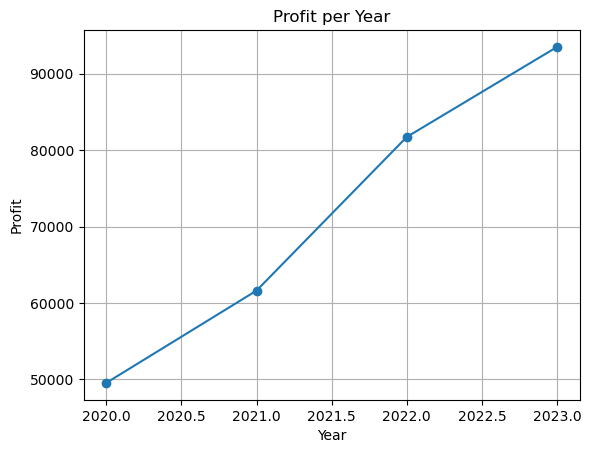

In [234]:
df['Year'] = df['Order Date'].dt.year

df['Year'] = df['Year'].astype(int)

yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', linestyle='-')
plt.title('Profit per Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

As SaaS gains popularity, it is not shocking to findn that the profit increases each and every year.

**Sales per Year**

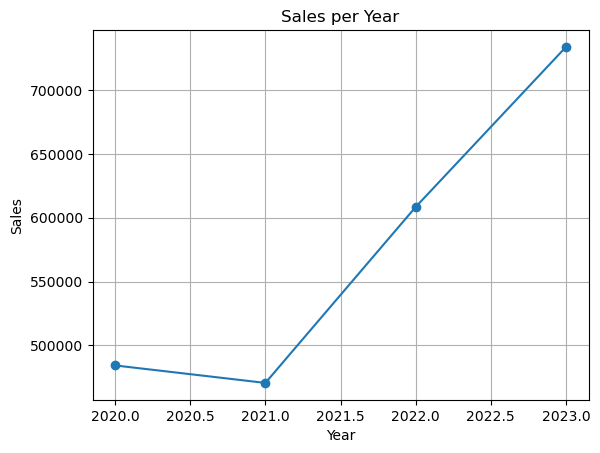

In [235]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-')
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

There is a dip between 2020-2022. This isn't surprising as COVID happened. However, they managed to get back up and the number of sales kept roaring.

**Quantity Sold per Year**

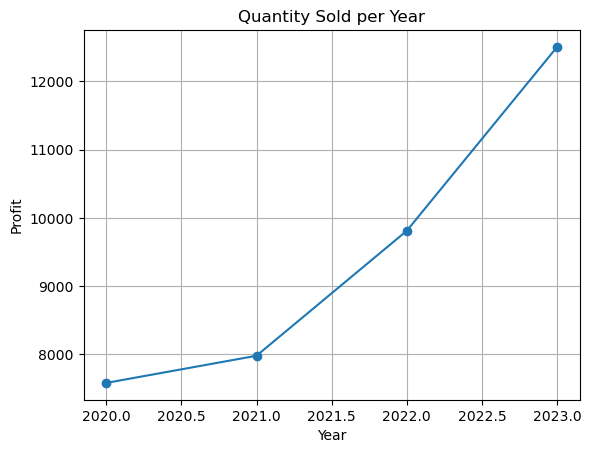

In [236]:
yearly_quantity = df.groupby('Year')['Quantity'].sum().reset_index()

plt.plot(yearly_quantity['Year'], yearly_quantity['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Sold per Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Similar to profit per year, the quantity kept rising; showing a positive trend.

#### **4.2. Geographical Performance Analysis**

We will start from region -> country -> city.

**Profit per Region**

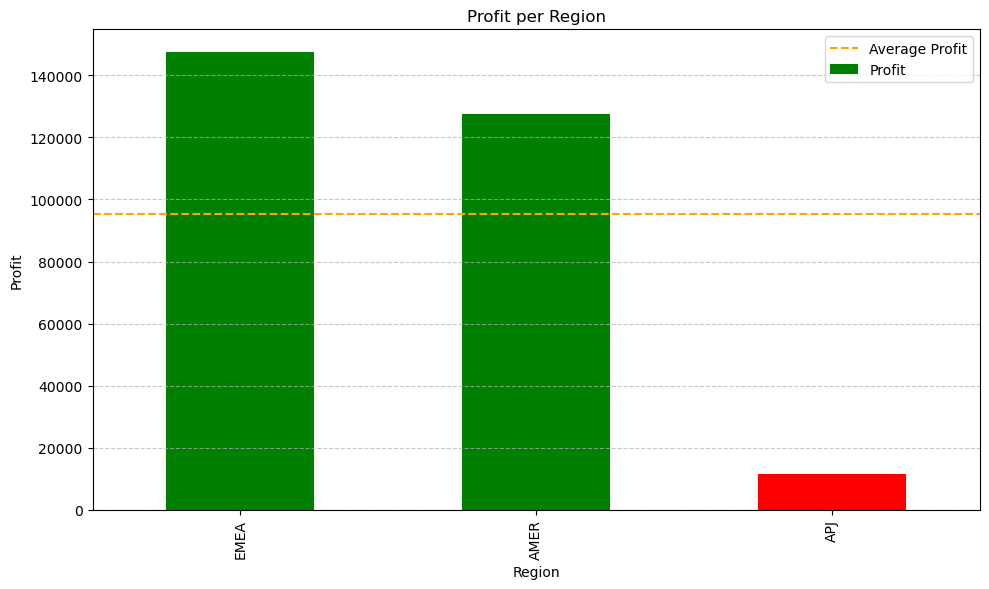

In [237]:
region_profit = df.groupby('Region')['Profit'].sum()

region_profit = region_profit.sort_values(ascending=False)

avg_profit = region_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in region_profit]

plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales per Region**

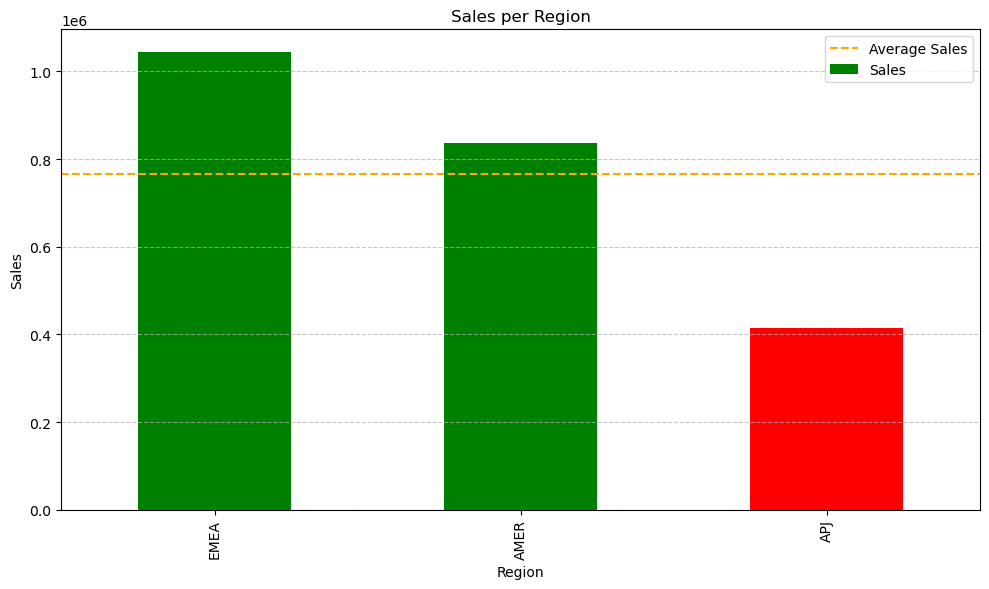

In [238]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales = region_sales.sort_values(ascending=False)

avg_sales = region_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in region_sales]

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
plt.title('Sales per Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Sold per Region**

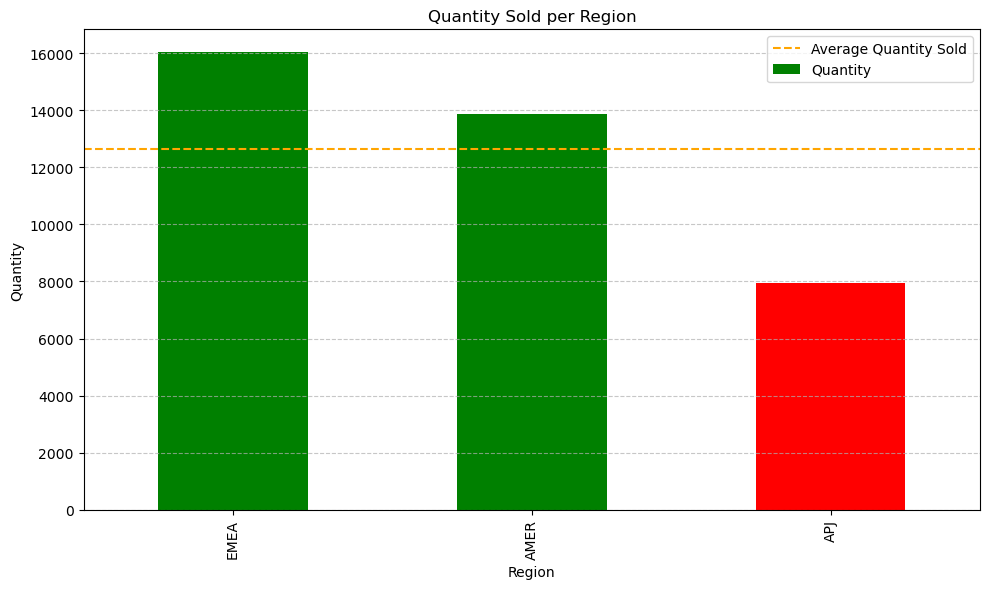

In [239]:
region_quantity = df.groupby('Region')['Quantity'].sum()

region_quantity = region_quantity.sort_values(ascending=False)

avg_quantity = region_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in region_quantity]

plt.figure(figsize=(10, 6))
region_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity Sold')
plt.title('Quantity Sold per Region')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It can be concluded that APJ is the weakest region out of it all because it consistently scored the lowest in all areas (profit, sales, and quantity)

**Profit per Country**

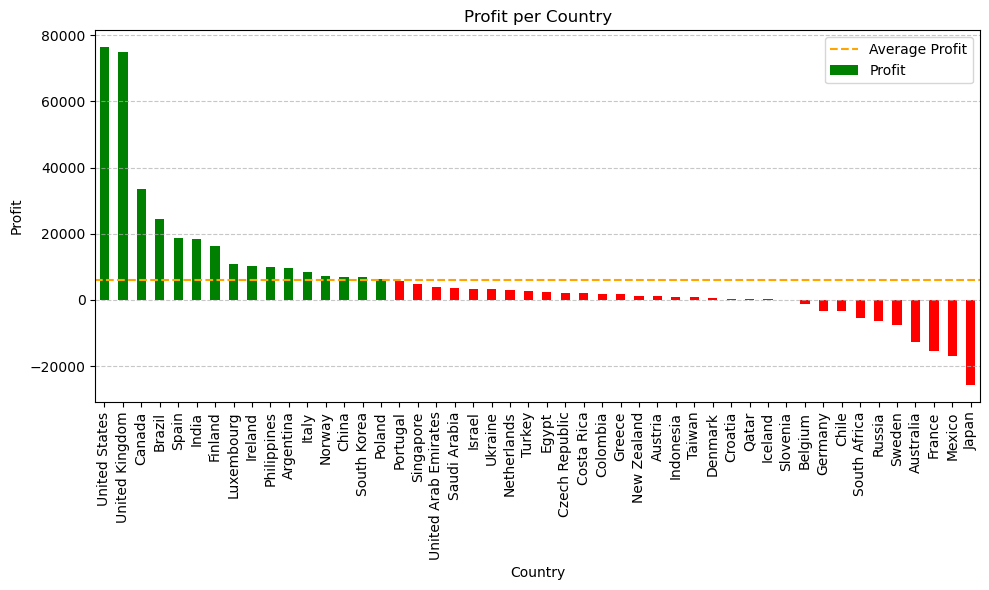

In [240]:
country_profit = df.groupby('Country')['Profit'].sum()

country_profit = country_profit.sort_values(ascending=False)

avg_profit = country_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in country_profit]

plt.figure(figsize=(10, 6))
country_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales per Country**

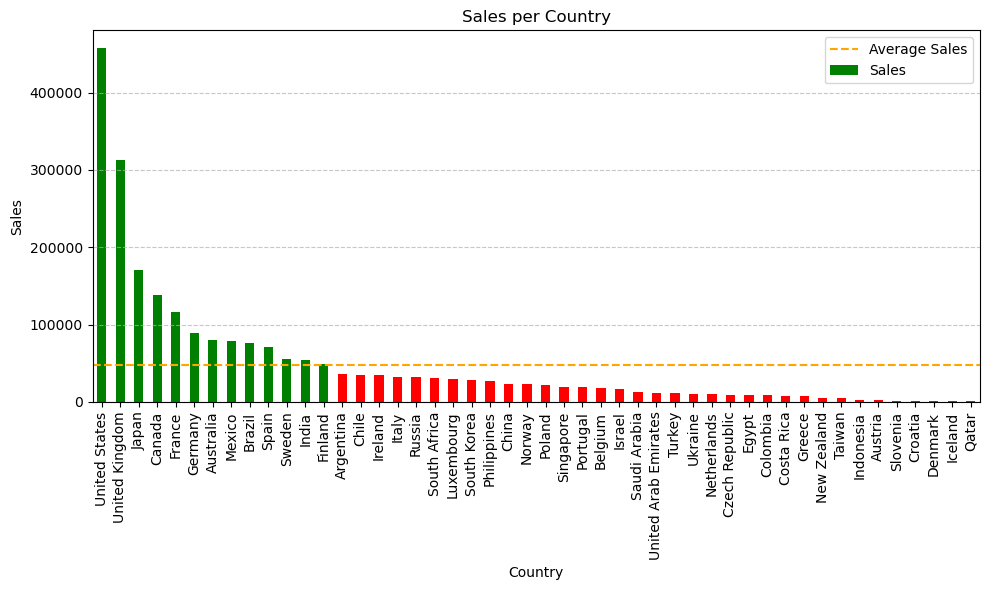

In [241]:
country_sales = df.groupby('Country')['Sales'].sum()

country_sales = country_sales.sort_values(ascending=False)

avg_sales = country_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in country_sales]

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Sold per Country**

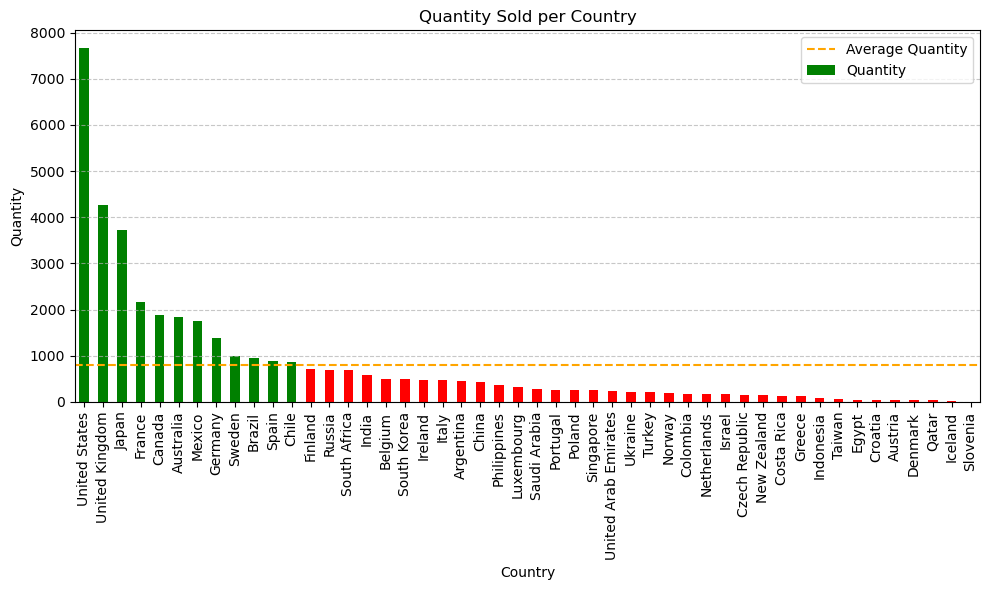

In [242]:
country_quantity = df.groupby('Country')['Quantity'].sum()

country_quantity = country_quantity.sort_values(ascending=False)

avg_quantity = country_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in country_quantity]

plt.figure(figsize=(10, 6))
country_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Quantity Sold per Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As you can see, the top performing countries are:
<br>

Profit
1. US
2. UK
3. Canada

Sales
1. US
2. UK
3. Japan

Quantity
<br>
1. US
2. UK
3. Japan

The worst performing countries are:
<br>

Profit
1. Japan
2. Mexico
3. France

Sales
1. Qatar
2. Iceland
3. Denmark

Quantity
1. Qatar
2. Iceland
3. Slovenia

If we want to focus on APJ region, then the graphs will look like this:

**Profit Sold per Country (Region: APJ)**

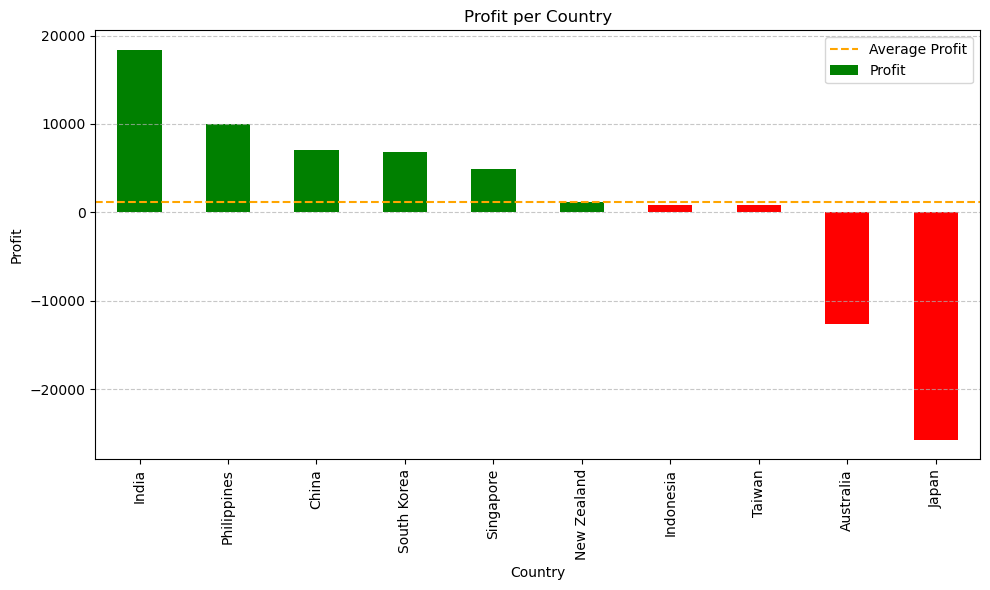

In [243]:
df_apj = df[df['Region'] == 'APJ']

country_profit = df_apj.groupby('Country')['Profit'].sum()

country_profit = country_profit.sort_values(ascending=False)

avg_profit = country_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in country_profit]

plt.figure(figsize=(10, 6))
country_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales per Country (Region: APJ)**

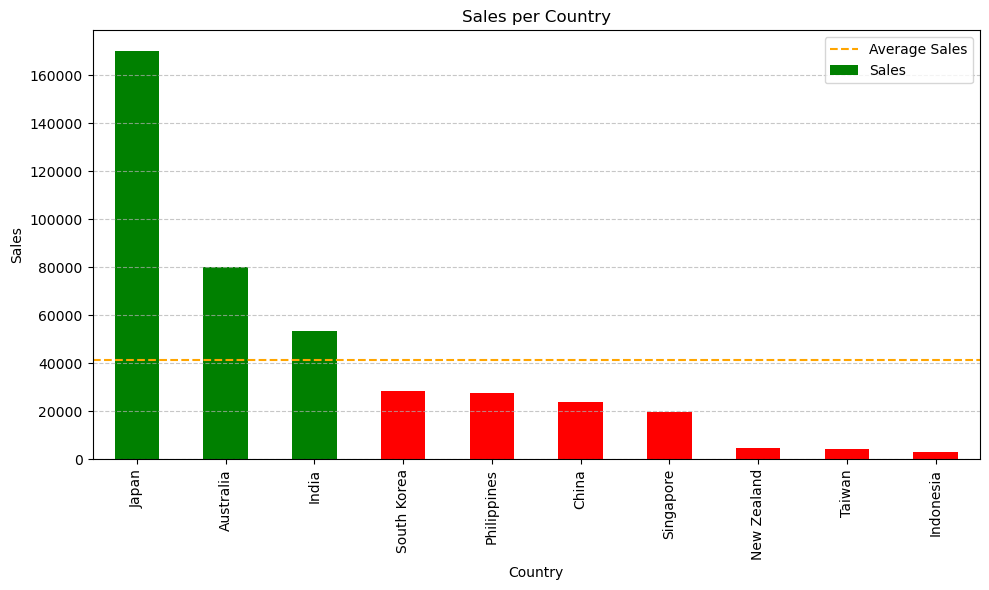

In [244]:
country_sales = df_apj.groupby('Country')['Sales'].sum()

country_sales = country_sales.sort_values(ascending=False)

avg_sales = country_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in country_sales]

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Sold per Country (Region: APJ)**

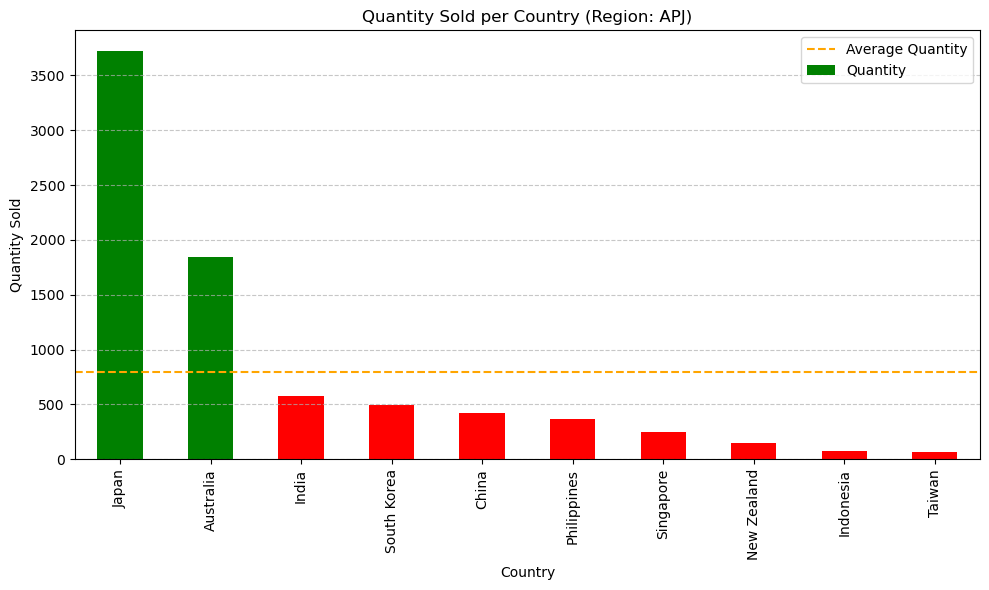

In [245]:
country_quantity = df_apj.groupby('Country')['Quantity'].sum()

country_quantity = country_quantity.sort_values(ascending=False)

avg_quantity = country_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in country_quantity]

plt.figure(figsize=(10, 6))
country_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Quantity Sold per Country (Region: APJ)')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on that, the top performing countries in APJ are:
<br>

Profit
1. India
2. Philippines
3. China

Sales
1. Japan
2. Australia
3. India

Quantity
<br>
1. Japan
2. Australia
3. India (but the quantity is under average)

The worst performing countries in APJ are:
<br>

Profit
1. Japan
2. Australia
3. Taiwan

Sales
1. Indonesia
2. Taiwan
3. New Zealand

Quantity
1. Taiwan
2. Indonesia
3. New Zealand

Next, we will analyze it per city, but only ones in APJ.

**Profit per City (Region: APJ)**

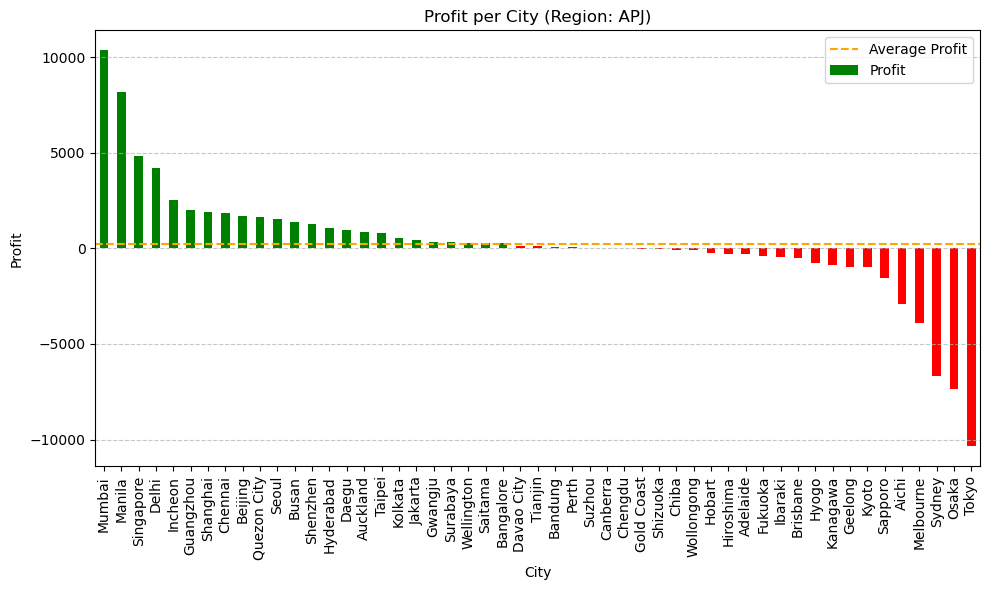

In [246]:
city_profit = df_apj.groupby('City')['Profit'].sum()

city_profit = city_profit.sort_values(ascending=False)

avg_profit = city_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in city_profit]

plt.figure(figsize=(10, 6))
city_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per City (Region: APJ)')
plt.xlabel('City')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales per City (Region: APJ)**

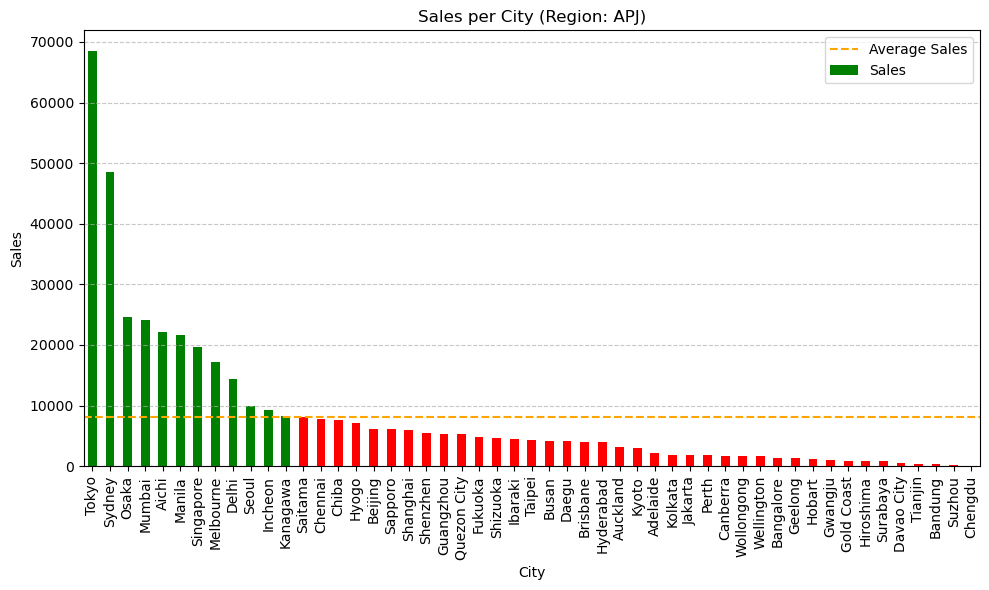

In [247]:
city_sales = df_apj.groupby('City')['Sales'].sum()

city_sales = city_sales.sort_values(ascending=False)

avg_sales = city_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in city_sales]

plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
plt.title('Sales per City (Region: APJ)')
plt.xlabel('City')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity per City (Region: APJ)**

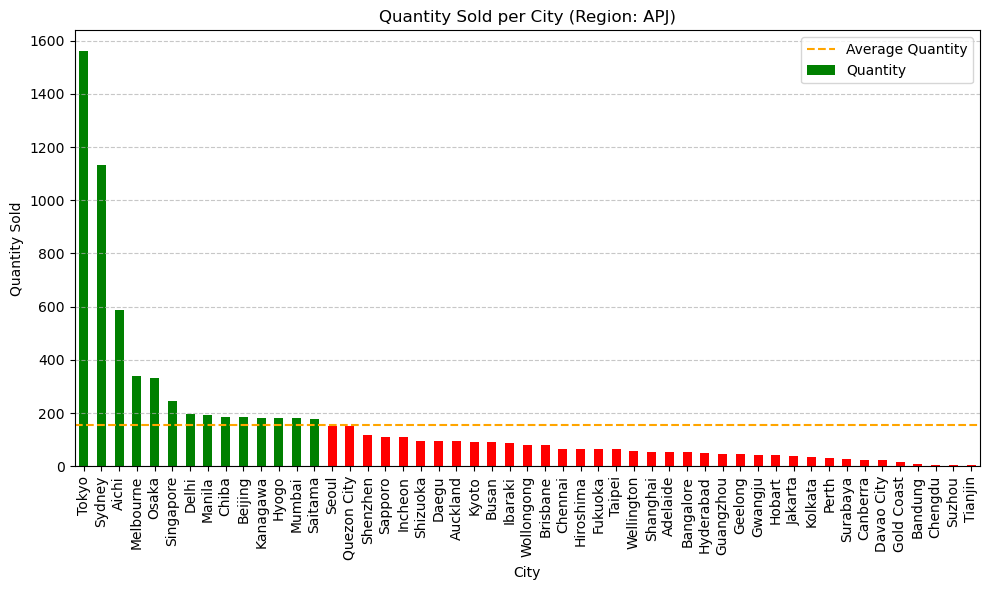

In [248]:
city_quantity = df_apj.groupby('City')['Quantity'].sum()

city_quantity = city_quantity.sort_values(ascending=False)

avg_quantity = city_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in city_quantity]

plt.figure(figsize=(10, 6))
city_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Quantity Sold per City (Region: APJ)')
plt.xlabel('City')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on that, the top performing cities in APJ are:
<br>

Profit
1. Mumbai
2. Manila
3. Singapore

Sales
1. Tokyo
2. Sydney
3. Osaka

Quantity
<br>
1. Tokyo
2. Sydney
3. Aichi

The worst performing countries in APJ are:
<br>

Profit
1. Tokyo
2. Osaka
3. Sydney

Sales
1. Chengdu
2. Suzhou
3. Bandung

Quantity
1. Tianjin
2. Suzhou
3. Chengdu

#### **4.3. Customer Segmentation Analysis**

Based on the dataset, the AWS team has divided the companies into 3 segments, which are: Enterprise, SMB, and Strategic.

For reference, I believe these are the definition for each segment:
<br>
- Enterprise: Large, complex organizations with significant revenue and extensive needs.
- SMB (Small and Medium-sized Businesses): Smaller companies with fewer employees and simpler needs.
- Strategic: Key accounts critical to the company's strategy, regardless of size.

For an overview, we will first analyze the current data using the known segmentations and compare APJ and non-APJ.

**Profit per Segment**

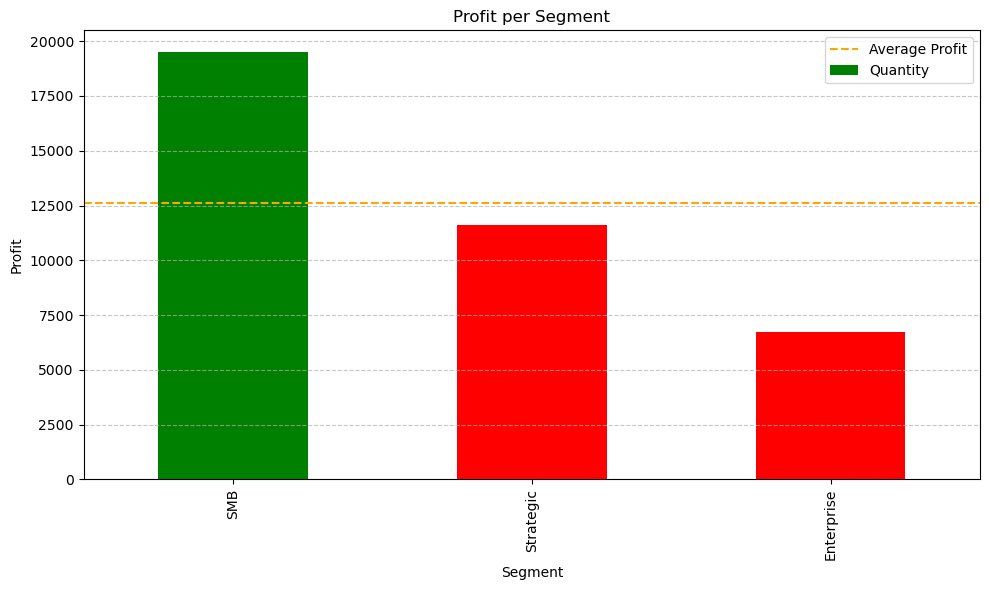

In [249]:
segment_profit = df.groupby('Segment')['Quantity'].sum()

segment_profit = segment_profit.sort_values(ascending=False)

avg_profit = segment_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in segment_profit]

plt.figure(figsize=(10, 6))
segment_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Profit per Segment (Region: APJ)**

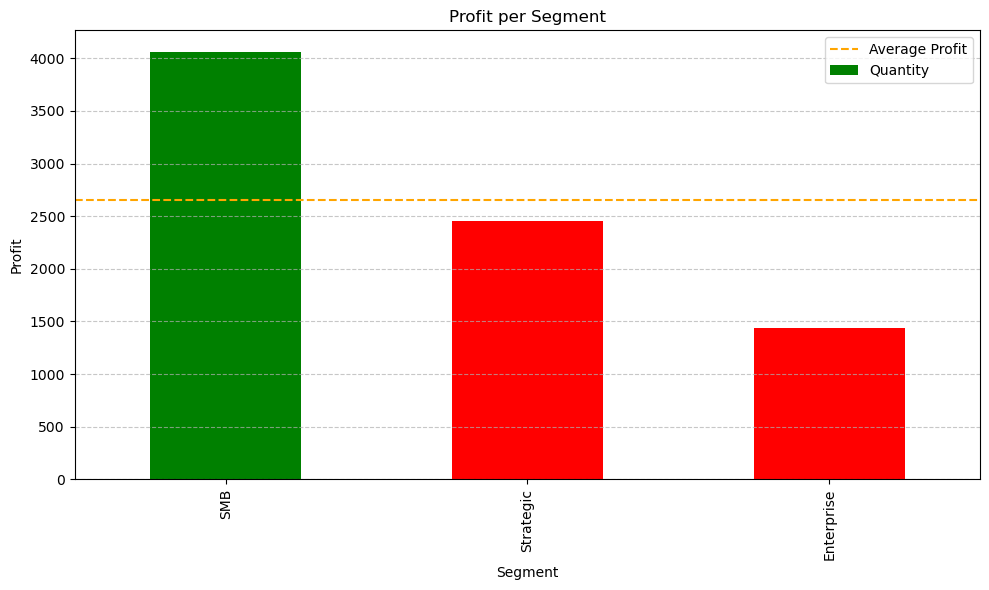

In [250]:
segment_profit = df_apj.groupby('Segment')['Quantity'].sum()

segment_profit = segment_profit.sort_values(ascending=False)

avg_profit = segment_profit.mean()

colors = ['green' if profit >= avg_profit else 'red' for profit in segment_profit]

plt.figure(figsize=(10, 6))
segment_profit.plot(kind='bar', color=colors)
plt.axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
plt.title('Profit per Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales Sold per Segment**

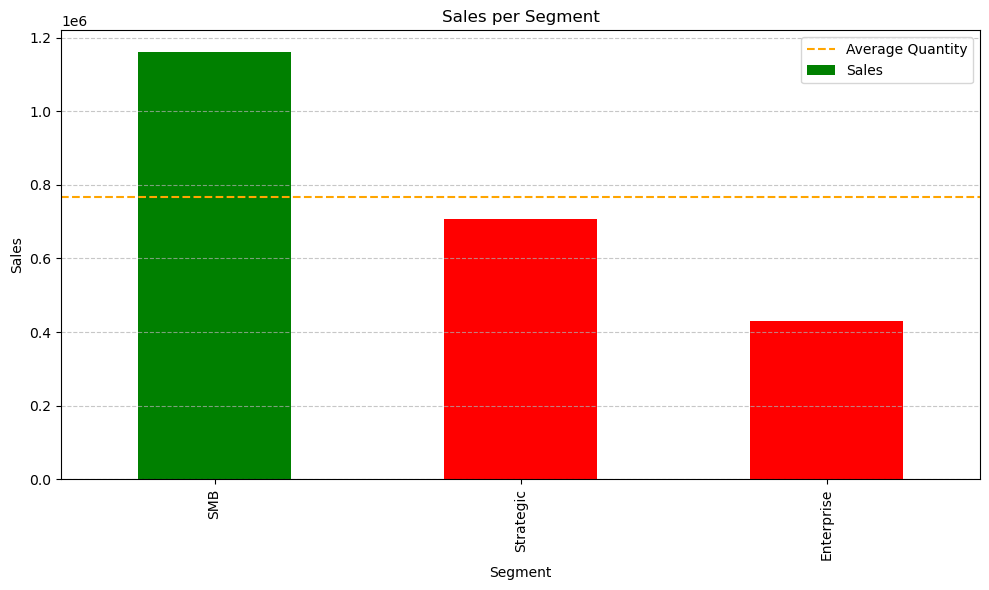

In [251]:
segment_sales = df.groupby('Segment')['Sales'].sum()

segment_sales = segment_sales.sort_values(ascending=False)

avg_sales = segment_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in segment_sales]

plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Sales per Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Sales per Segment (Region: APJ)**

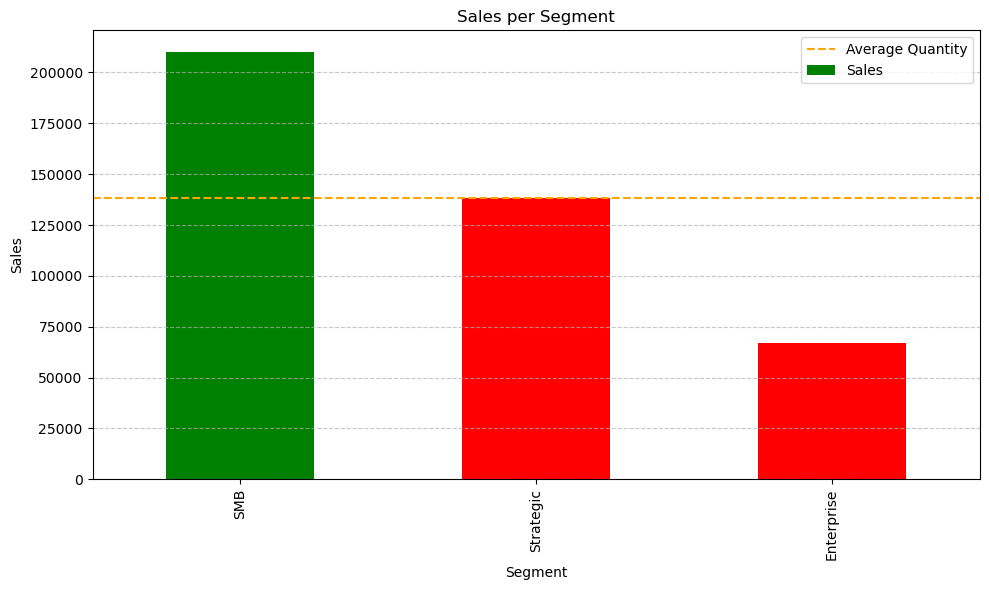

In [252]:
segment_sales = df_apj.groupby('Segment')['Sales'].sum()

segment_sales = segment_sales.sort_values(ascending=False)

avg_sales = segment_sales.mean()

colors = ['green' if sales >= avg_sales else 'red' for sales in segment_sales]

plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar', color=colors)
plt.axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Sales per Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Sold per Segment**

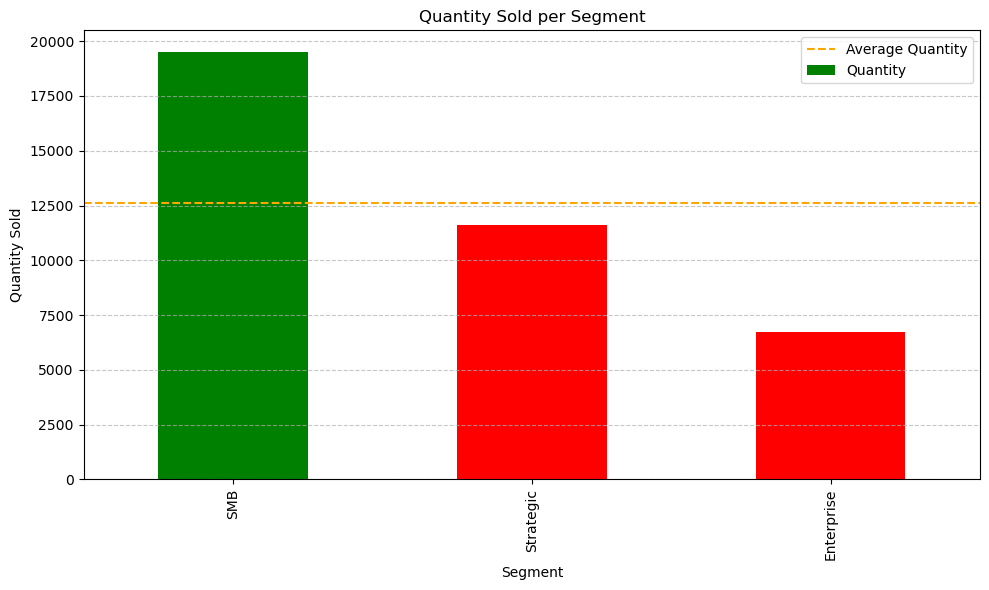

In [253]:
segment_quantity = df.groupby('Segment')['Quantity'].sum()

segment_quantity = segment_quantity.sort_values(ascending=False)

avg_quantity = segment_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in segment_quantity]

plt.figure(figsize=(10, 6))
segment_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Quantity Sold per Segment')
plt.xlabel('Segment')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Sold per Segment (Region: APJ)**

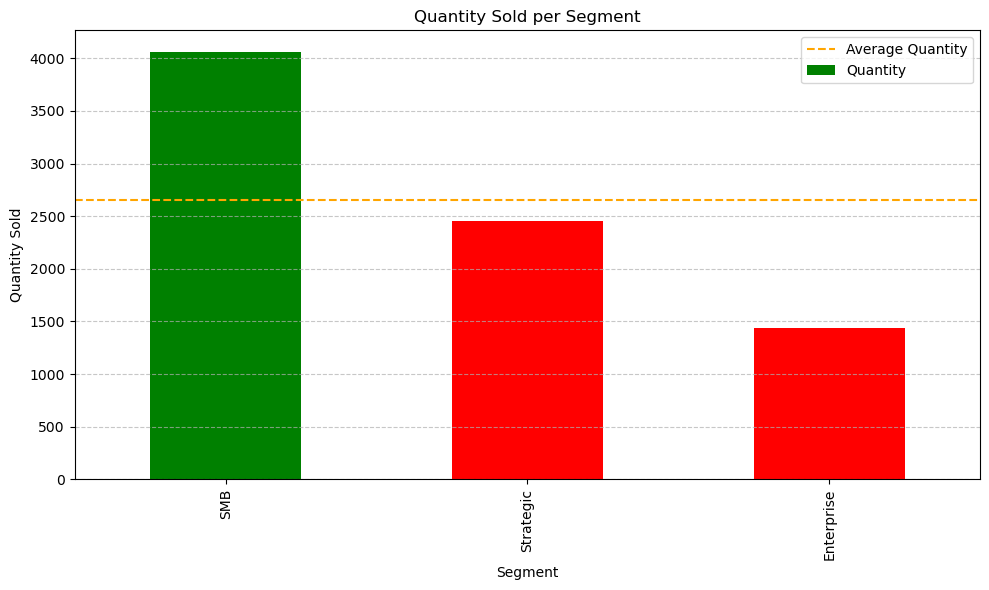

In [254]:
segment_quantity = df_apj.groupby('Segment')['Quantity'].sum()

segment_quantity = segment_quantity.sort_values(ascending=False)

avg_quantity = segment_quantity.mean()

colors = ['green' if quantity >= avg_quantity else 'red' for quantity in segment_quantity]

plt.figure(figsize=(10, 6))
segment_quantity.plot(kind='bar', color=colors)
plt.axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
plt.title('Quantity Sold per Segment')
plt.xlabel('Segment')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As you can see, in terms of ratio, there are no significant differences between SBM, Strategic and Enterprise.

#### **4.4. Recency, Frequency, and Monetary (RFM) Analysis**

To dive deeper into what AWS need to strengthen their market value. I believe that it is important to create and RFM Analysis to see which country, city, and customers are performing and not performing. Thus here are the analysis for each of them:

**RFM on Country**

In [255]:
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)
df_country = df.groupby('Country').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Sales', 'sum')
).reset_index()
df_country.sort_values(by='Monetary').head()

,Country,Recency,Frequency,Monetary
33,Qatar,3,2,919.910
18,Iceland,80,2,1209.824
12,Denmark,470,3,1270.530
10,Croatia,50,5,1315.560
37,Slovenia,419,1,1603.136


In [256]:
df_country.describe()

,Recency,Frequency,Monetary
count,48.000000,48.000000,48.000000
mean,41.354167,104.375000,47858.351256
std,100.141493,179.845398,81510.619390
min,1.000000,1.000000,919.910000
25%,3.750000,21.750000,8817.455000
50%,8.500000,44.000000,22416.553000
75%,27.250000,95.250000,50210.720000
max,470.000000,1021.000000,457687.631500


In [257]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 3.75:
        r_score = 4
    elif row['Recency'] <= 8.5:
        r_score = 3
    elif row['Recency'] <= 27.25:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 21.75:
        f_score = 1
    elif row['Frequency'] <= 44:
        f_score = 2
    elif row['Frequency'] <= 95.25:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 8817.455:
        m_score = 1
    elif row['Monetary'] <= 22416.553:
        m_score = 2
    elif row['Monetary'] <= 50210.72:
        m_score = 3
    else:
        m_score = 4
    
    return str(r_score) + str(f_score) + str(m_score)

df_country['RFM Segment'] = df_country.apply(rfm_segment, axis=1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment
0,Argentina,6,61,35764.3120,333
1,Australia,3,276,80166.1010,444
2,Austria,353,4,2865.0200,111
3,Belgium,44,56,17431.1500,132
4,Brazil,2,117,76269.6140,444
5,Canada,2,256,138641.2700,444
6,Chile,7,108,35282.0010,343
7,China,33,46,23705.5230,133
8,Colombia,10,20,8481.7100,211
9,Costa Rica,5,23,7464.9300,321


In [258]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 3.75:
        r_score = 4
    elif row['Recency'] <= 8.5:
        r_score = 3
    elif row['Recency'] <= 27.25:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 21.75:
        f_score = 1
    elif row['Frequency'] <= 44:
        f_score = 2
    elif row['Frequency'] <= 95.25:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 8817.455:
        m_score = 1
    elif row['Monetary'] <= 22416.553:
        m_score = 2
    elif row['Monetary'] <= 50210.72:
        m_score = 3
    else:
        m_score = 4
    
    return r_score + f_score + m_score

df_country['RFM Score'] = df_country.apply(rfm_segment, axis=1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score
0,Argentina,6,61,35764.3120,333,9
1,Australia,3,276,80166.1010,444,12
2,Austria,353,4,2865.0200,111,3
3,Belgium,44,56,17431.1500,132,6
4,Brazil,2,117,76269.6140,444,12
5,Canada,2,256,138641.2700,444,12
6,Chile,7,108,35282.0010,343,10
7,China,33,46,23705.5230,133,7
8,Colombia,10,20,8481.7100,211,4
9,Costa Rica,5,23,7464.9300,321,6


In [259]:
def rfm_label(row):
    if row['RFM Score'] >= 11:
        return 'High Opportunity'
    elif 8 <= row['RFM Score'] < 11:
        return 'Growing Markets'
    elif 5 <= row['RFM Score'] < 8:
        return 'Underdeveloped Markets'
    else:
        return 'At Risk/Need Attention'

df_country['RFM Label'] = df_country.apply(rfm_label, axis=1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Label
0,Argentina,6,61,35764.3120,333,9,Growing Markets
1,Australia,3,276,80166.1010,444,12,High Opportunity
2,Austria,353,4,2865.0200,111,3,At Risk/Need Attention
3,Belgium,44,56,17431.1500,132,6,Underdeveloped Markets
4,Brazil,2,117,76269.6140,444,12,High Opportunity
5,Canada,2,256,138641.2700,444,12,High Opportunity
6,Chile,7,108,35282.0010,343,10,Growing Markets
7,China,33,46,23705.5230,133,7,Underdeveloped Markets
8,Colombia,10,20,8481.7100,211,4,At Risk/Need Attention
9,Costa Rica,5,23,7464.9300,321,6,Underdeveloped Markets


In [260]:
percentage = df_country['RFM Label'].value_counts()/len(df_country)*100
percentage

RFM Label
Underdeveloped Markets    41.666667
Growing Markets           22.916667
High Opportunity          18.750000
At Risk/Need Attention    16.666667
Name: count, dtype: float64

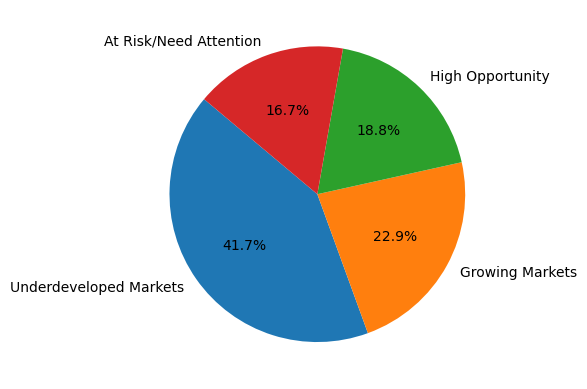

In [261]:
rfm_counts = df_country['RFM Label'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

**RFM on City where Region: APJ**

In [262]:
reference_date = df_apj['Order Date'].max() + pd.Timedelta(days=1)
df_city = df_apj.groupby('City').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Sales', 'sum')
).reset_index()
df_city.sort_values(by='Monetary').head()

,City,Recency,Frequency,Monetary
9,Chengdu,44,1,43.80
44,Suzhou,217,1,152.59
3,Bandung,37,3,312.38
47,Tianjin,729,1,405.92
13,Davao City,559,6,449.12


In [263]:
df_city.describe()

,Recency,Frequency,Monetary
count,51.000000,51.000000,51.000000
mean,130.509804,21.117647,8146.357663
std,210.239423,36.867138,12318.483624
min,1.000000,1.000000,43.800000
25%,15.500000,6.000000,1637.663500
50%,37.000000,12.000000,4382.486000
75%,120.500000,19.000000,7945.935200
max,808.000000,204.000000,68485.426400


In [264]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 15.5:
        r_score = 4
    elif row['Recency'] <= 37:
        r_score = 3
    elif row['Recency'] <= 120.5:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 6:
        f_score = 1
    elif row['Frequency'] <= 12:
        f_score = 2
    elif row['Frequency'] <= 19:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 1637.663500:
        m_score = 1
    elif row['Monetary'] <= 4382.486:
        m_score = 2
    elif row['Monetary'] <= 7945.9352:
        m_score = 3
    else:
        m_score = 4
    
    return str(r_score) + str(f_score) + str(m_score)

df_city['RFM Segment'] = df_city.apply(rfm_segment, axis=1)
df_city

,City,Recency,Frequency,Monetary,RFM Segment
0,Adelaide,3,7,2111.0040,422
1,Aichi,6,84,22090.9452,444
2,Auckland,3,14,3149.0700,432
3,Bandung,37,3,312.3800,311
4,Bangalore,351,7,1333.7800,121
5,Beijing,33,21,6156.8420,343
6,Brisbane,17,13,4043.1320,332
7,Busan,98,15,4228.5500,232
8,Canberra,808,2,1645.7700,112
9,Chengdu,44,1,43.8000,211


In [265]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 15.5:
        r_score = 4
    elif row['Recency'] <= 37:
        r_score = 3
    elif row['Recency'] <= 120.5:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 6:
        f_score = 1
    elif row['Frequency'] <= 12:
        f_score = 2
    elif row['Frequency'] <= 19:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 1637.663500:
        m_score = 1
    elif row['Monetary'] <= 4382.486:
        m_score = 2
    elif row['Monetary'] <= 7945.9352:
        m_score = 3
    else:
        m_score = 4
    
    return r_score + f_score + m_score

df_city['RFM Score'] = df_city.apply(rfm_segment, axis=1)
df_city

,City,Recency,Frequency,Monetary,RFM Segment,RFM Score
0,Adelaide,3,7,2111.0040,422,8
1,Aichi,6,84,22090.9452,444,12
2,Auckland,3,14,3149.0700,432,9
3,Bandung,37,3,312.3800,311,5
4,Bangalore,351,7,1333.7800,121,4
5,Beijing,33,21,6156.8420,343,10
6,Brisbane,17,13,4043.1320,332,8
7,Busan,98,15,4228.5500,232,7
8,Canberra,808,2,1645.7700,112,4
9,Chengdu,44,1,43.8000,211,4


In [266]:
def rfm_label(row):
    if row['RFM Score'] >= 11:
        return 'High Opportunity'
    elif 8 <= row['RFM Score'] < 11:
        return 'Growing Markets'
    elif 5 <= row['RFM Score'] < 8:
        return 'Underdeveloped Markets'
    else:
        return 'At Risk/Need Attention'

df_city['RFM Label'] = df_city.apply(rfm_label, axis=1)
df_city

,City,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Label
0,Adelaide,3,7,2111.0040,422,8,Growing Markets
1,Aichi,6,84,22090.9452,444,12,High Opportunity
2,Auckland,3,14,3149.0700,432,9,Growing Markets
3,Bandung,37,3,312.3800,311,5,Underdeveloped Markets
4,Bangalore,351,7,1333.7800,121,4,At Risk/Need Attention
5,Beijing,33,21,6156.8420,343,10,Growing Markets
6,Brisbane,17,13,4043.1320,332,8,Growing Markets
7,Busan,98,15,4228.5500,232,7,Underdeveloped Markets
8,Canberra,808,2,1645.7700,112,4,At Risk/Need Attention
9,Chengdu,44,1,43.8000,211,4,At Risk/Need Attention


In [267]:
percentage = df_city['RFM Label'].value_counts()/len(df_city)*100
percentage

RFM Label
Growing Markets           29.411765
Underdeveloped Markets    27.450980
High Opportunity          21.568627
At Risk/Need Attention    21.568627
Name: count, dtype: float64

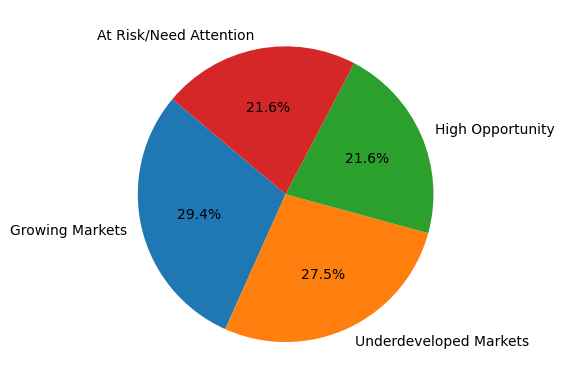

In [268]:
rfm_counts = df_city['RFM Label'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

**RFM on Customers**

In [269]:
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)
df_customers = df.groupby('Customer').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Sales', 'sum')
).reset_index()
df_customers.sort_values(by='Monetary').head()

,Customer,Recency,Frequency,Monetary
39,Gazprom,44,23,5402.902
27,Citigroup,240,13,6132.521
78,Safeway,77,20,6633.137
17,Berkshire Hathaway,5,25,7100.929
86,Tesco,36,24,8173.226


In [270]:
df_customers.describe()

,Recency,Frequency,Monetary
count,99.000000,99.000000,99.000000
mean,20.343434,50.595960,23204.049094
std,30.589835,17.537667,10006.663857
min,1.000000,13.000000,5402.902000
25%,5.500000,38.500000,15692.639000
50%,10.000000,52.000000,22650.820600
75%,23.000000,60.000000,29486.288500
max,240.000000,103.000000,55719.210000


In [271]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 5.5:
        r_score = 4
    elif row['Recency'] <= 10:
        r_score = 3
    elif row['Recency'] <= 23:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 38.5:
        f_score = 1
    elif row['Frequency'] <= 52:
        f_score = 2
    elif row['Frequency'] <= 60:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 15692.639:
        m_score = 1
    elif row['Monetary'] <= 22650.820600:
        m_score = 2
    elif row['Monetary'] <= 29486.288500:
        m_score = 3
    else:
        m_score = 4
    
    return str(r_score) + str(f_score) + str(m_score)

df_customers['RFM Segment'] = df_customers.apply(rfm_segment, axis=1)
df_customers

,Customer,Recency,Frequency,Monetary,RFM Segment
0,AT&T,10,67,29462.3240,343
1,Abbott Laboratories,13,31,12617.1140,211
2,Aetna,22,76,27278.5930,243
3,Airbus,28,58,29798.5930,134
4,Allianz,2,102,42904.1670,444
...,...,...,...,...,...
94,Volkswagen,22,65,35200.4240,244
95,Walgreens,15,33,14420.6190,211
96,Walmart,21,46,21508.1790,222
97,Walt Disney,23,53,29483.0050,233


In [272]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 5.5:
        r_score = 4
    elif row['Recency'] <= 10:
        r_score = 3
    elif row['Recency'] <= 23:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 38.5:
        f_score = 1
    elif row['Frequency'] <= 52:
        f_score = 2
    elif row['Frequency'] <= 60:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 15692.639:
        m_score = 1
    elif row['Monetary'] <= 22650.820600:
        m_score = 2
    elif row['Monetary'] <= 29486.288500:
        m_score = 3
    else:
        m_score = 4
    
    return r_score + f_score + m_score

df_customers['RFM Score'] = df_customers.apply(rfm_segment, axis=1)
df_customers

,Customer,Recency,Frequency,Monetary,RFM Segment,RFM Score
0,AT&T,10,67,29462.3240,343,10
1,Abbott Laboratories,13,31,12617.1140,211,4
2,Aetna,22,76,27278.5930,243,9
3,Airbus,28,58,29798.5930,134,8
4,Allianz,2,102,42904.1670,444,12
...,...,...,...,...,...,...
94,Volkswagen,22,65,35200.4240,244,10
95,Walgreens,15,33,14420.6190,211,4
96,Walmart,21,46,21508.1790,222,6
97,Walt Disney,23,53,29483.0050,233,8


In [273]:
def rfm_label(row):
    if row['RFM Score'] >= 11:
        return 'Top Customers'
    elif 8 <= row['RFM Score'] < 11:
        return 'Loyal Customers'
    elif 5 <= row['RFM Score'] < 8:
        return 'Immediate Attention'
    else:
        return 'At Risk/Need Attention'

df_customers['RFM Label'] = df_customers.apply(rfm_label, axis=1)
df_customers

,Customer,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Label
0,AT&T,10,67,29462.3240,343,10,Loyal Customers
1,Abbott Laboratories,13,31,12617.1140,211,4,At Risk/Need Attention
2,Aetna,22,76,27278.5930,243,9,Loyal Customers
3,Airbus,28,58,29798.5930,134,8,Loyal Customers
4,Allianz,2,102,42904.1670,444,12,Top Customers
...,...,...,...,...,...,...,...
94,Volkswagen,22,65,35200.4240,244,10,Loyal Customers
95,Walgreens,15,33,14420.6190,211,4,At Risk/Need Attention
96,Walmart,21,46,21508.1790,222,6,Immediate Attention
97,Walt Disney,23,53,29483.0050,233,8,Loyal Customers


In [274]:
percentage = df_customers['RFM Label'].value_counts()/len(df_customers)*100
percentage

RFM Label
Immediate Attention       34.343434
Loyal Customers           33.333333
At Risk/Need Attention    16.161616
Top Customers             16.161616
Name: count, dtype: float64

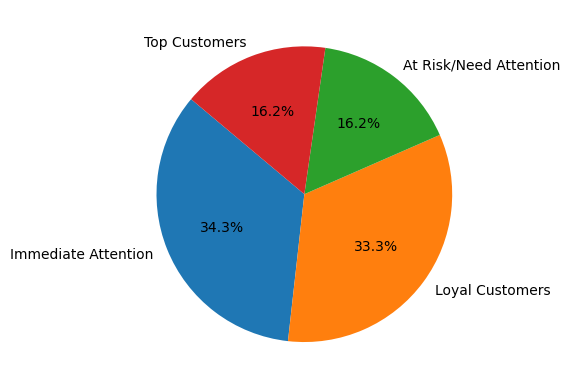

In [275]:
rfm_counts = df_customers['RFM Label'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

***
### **5. Final Thoughts**

#### **5.1. Conclusion**

The analysis uncovers a consistent performance gap within the APJ region, indicating challenges in profit, sales, and quantity metrics. Japan emerges as the weakest performer across all categories, while the US, UK, and Canada consistently lead.

In APJ, India, the Philippines, and China show promise in profit generation, yet Japan dominates sales and quantity metrics. Notably, Japan's lead in quantity doesn't translate to strong profit and sales performance.

Zooming into cities, Mumbai, Manila, and Singapore shine in profit generation, while Tokyo, Sydney, and Osaka lead in sales. However, Tokyo, Osaka, and Sydney struggle in profit generation despite strong sales and quantity.

#### **5.2. Recommendation**

1. **Focus on Underperforming Markets**:
Prioritize efforts to enhance performance in underperforming markets like Japan, Australia, and Taiwan. Conduct thorough market analyses and devise targeted strategies to boost sales and profitability.

2. **Strategic Allocation of Resources**: Allocate resources strategically based on RFM analysis to cater to diverse market segment needs. Pay attention to "At Risk/Need Attention" segments while capitalizing on growth opportunities in "High Opportunity" segments.

3. **Customer-Centric Approach**: Implement a customer-centric approach by offering tailored solutions to different segments. Prioritize immediate attention to intervention-needed customers and nurture loyal ones for long-term profitability.

4. **Continuous Monitoring and Adaptation**: Establish a system for continuous monitoring of market dynamics and performance metrics. Stay agile and responsive to market changes to drive sustainable growth in the APJ region.